## Pre-Installations of packages
Copy one of these lines into the next cell. Beware: pip does not like comments so paste it, run the cell and delete it again!
- pip install geopandas
- pip install h3
- pip install matplotlib
- pip install descartes

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import geopandas
import os
import json
import numpy as np
from h3 import h3
from shapely.geometry import shape
import matplotlib.pyplot as plt

In [52]:
path_trips=os.path.join(os.getcwd(), '..', 'data', 'output', 'Trips.csv')
path_output=os.path.join(os.getcwd(), '..', 'data', 'output')
path_geo =os.path.join(os.getcwd(), '..', 'data', 'input', 'geodata', 'dresden_bounding_box.geojson')

print("Trips path:", path_trips)
print("Output path:", path_output)
print("GeoJSON path:", path_geo)

Trips path: /Users/mstroh/PycharmProjects/AAA_Jupyter_Explorers/notebooks/../data/output/Trips.csv
Output path: /Users/mstroh/PycharmProjects/AAA_Jupyter_Explorers/notebooks/../data/output
GeoJSON path: /Users/mstroh/PycharmProjects/AAA_Jupyter_Explorers/notebooks/../data/input/geodata/dresden_bounding_box.geojson


In [27]:
city_bounding_box = geopandas.read_file(path_geo)
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)
city_bounding_box_poly = city_bounding_box_json["features"][0]

In [28]:
# Valid GeoJSON object
city_bounding_box_poly

{'id': '0',
 'type': 'Feature',
 'properties': {},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[13.746466, 51.178629],
    [13.964722, 51.06278],
    [13.815186, 50.974527],
    [13.572688, 51.0637],
    [13.746466, 51.178629]]]}}

In [46]:
# Computing hexagons for a given polygon
H3_HEXAGON_RESOLUTION = 7
polygon_obj = city_bounding_box_poly["geometry"] # your geo json object
hexagons = h3.polyfill(geo_json = polygon_obj, res = H3_HEXAGON_RESOLUTION, geo_json_conformant = True)

In [47]:
# Returns only the index of each hexagon, not the geometries
hexagons

{'871f1b080ffffff',
 '871f1b082ffffff',
 '871f1b083ffffff',
 '871f1b086ffffff',
 '871f1b090ffffff',
 '871f1b091ffffff',
 '871f1b092ffffff',
 '871f1b093ffffff',
 '871f1b094ffffff',
 '871f1b095ffffff',
 '871f1b096ffffff',
 '871f1b098ffffff',
 '871f1b099ffffff',
 '871f1b09affffff',
 '871f1b09bffffff',
 '871f1b09cffffff',
 '871f1b09dffffff',
 '871f1b09effffff',
 '871f1b0b0ffffff',
 '871f1b0b1ffffff',
 '871f1b0b2ffffff',
 '871f1b0b3ffffff',
 '871f1b0b4ffffff',
 '871f1b0b5ffffff',
 '871f1b0b6ffffff',
 '871f1b19affffff',
 '871f1b19bffffff',
 '871f1b19effffff',
 '871f1b445ffffff',
 '871f1b460ffffff',
 '871f1b461ffffff',
 '871f1b462ffffff',
 '871f1b463ffffff',
 '871f1b464ffffff',
 '871f1b465ffffff',
 '871f1b466ffffff',
 '871f1b468ffffff',
 '871f1b469ffffff',
 '871f1b46affffff',
 '871f1b46bffffff',
 '871f1b46cffffff',
 '871f1b46dffffff',
 '871f1b46effffff',
 '871f1b540ffffff',
 '871f1b541ffffff',
 '871f1b542ffffff',
 '871f1b543ffffff',
 '871f1b545ffffff',
 '871f1b548ffffff',
 '871f1b549ffffff',


In [48]:
# Convert H3 Indexes to Geometry Objects

# Create geo data frame
df_hexagons = geopandas.GeoDataFrame(list(hexagons), columns=['h3_hex_id'], crs="EPSG:4326")

df_hexagons['geometry'] = df_hexagons[(df_hexagons['h3_hex_id'].notna())].apply(lambda row: shape({"type": "Polygon",
                                           "coordinates": [h3.h3_to_geo_boundary(h3_address=row["h3_hex_id"], geo_json=True)],
                                           "properties": ""
                                           }), axis=1)

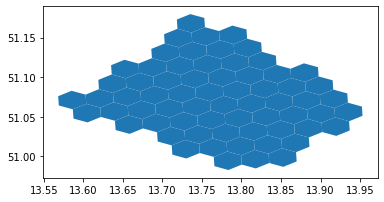

In [49]:
df_hexagons.plot()

In [50]:
df_hexagons

,h3_hex_id,geometry
0,871f1b0b6ffffff,"POLYGON ((13.73928 51.12120, 13.74008 51.10950..."
1,871f1b080ffffff,"POLYGON ((13.86199 51.11064, 13.86277 51.09893..."
2,871f1b099ffffff,"POLYGON ((13.91756 51.06088, 13.91833 51.04916..."
3,871f1b0b2ffffff,"POLYGON ((13.75783 51.10465, 13.75863 51.09294..."
4,871f1b463ffffff,"POLYGON ((13.74647 51.01578, 13.74726 51.00406..."
...,...,...
61,871f1b56bffffff,"POLYGON ((13.70456 51.11918, 13.70537 51.10747..."
62,871f1b098ffffff,"POLYGON ((13.88285 51.05891, 13.88362 51.04720..."
63,871f1b54dffffff,"POLYGON ((13.72312 51.10263, 13.72392 51.09093..."
64,871f1b0b3ffffff,"POLYGON ((13.79254 51.10665, 13.79333 51.09495..."


In [36]:
df_hexagons.to_csv(os.path.join(path_output, "hexagons-dresden.csv"))

In [59]:
df_trips = pd.read_csv(path_trips, index_col="Unnamed: 0")
df_trips.head()

,p_spot_start,b_lock_types_start,p_maintenance_start,p_bike_racks_start,p_terminal_type_start,p_place_type_start,p_number_start,p_uid_start,b_number_start,p_free_racks_start,...,p_lat_end,p_bike_types_end,MESS_DATUM,air_deg,air_hum,rain_mm,rain_yn,sun_hour,wind_ms,trip_duration
0,False,analog_code_lock,False,0,NaN,12,0.0,12095573,93771,0,...,51.046234,"{""15"": 1}",2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,28.0
1,True,analog_code_lock,False,0,free,0,4486.0,10299640,93576,0,...,51.049069,"{""15"": 1}",2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,10.0
2,True,frame_lock,False,0,free,0,4483.0,10299584,93440,0,...,51.028370,"{""undefined"": 1, ""15"": 2}",2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,26.0
3,True,analog_code_lock,False,0,NaN,0,4373.0,264575,93585,0,...,51.071740,"{""undefined"": 3, ""15"": 2}",2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,28.0
4,False,analog_code_lock,False,0,NaN,12,0.0,12098234,93322,0,...,51.041798,"{""undefined"": 1}",2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,2.0


In [60]:
df_trips.columns

Index(['p_spot_start', 'b_lock_types_start', 'p_maintenance_start',
       'p_bike_racks_start', 'p_terminal_type_start', 'p_place_type_start',
       'p_number_start', 'p_uid_start', 'b_number_start', 'p_free_racks_start',
       'b_boardcomputer_start', 'datetime_start', 'p_lng_start',
       'p_address_start', 'b_electric_lock_start', 'p_bikes_start',
       'p_booked_bikes_start', 'p_name_start', 'b_bike_type_start',
       'p_lat_start', 'b_pedelec_battery_start', 'p_bike_types_start',
       'p_spot_end', 'p_maintenance_end', 'p_bike_racks_end',
       'p_terminal_type_end', 'p_place_type_end', 'p_number_end', 'p_uid_end',
       'p_free_racks_end', 'datetime_end', 'p_lng_end', 'p_address_end',
       'p_bikes_end', 'p_booked_bikes_end', 'p_name_end', 'p_lat_end',
       'p_bike_types_end', 'MESS_DATUM', 'air_deg', 'air_hum', 'rain_mm',
       'rain_yn', 'sun_hour', 'wind_ms', 'trip_duration'],
      dtype='object')

In [61]:
# Get the hexagon for a data point
# Assume we have a dataframe with a column for latitude and longitude representing "point data".
df_trips["h3_hex_id_start"] = df_trips.apply(lambda row: h3.geo_to_h3(row["p_lat_start"], row["p_lng_start"], H3_HEXAGON_RESOLUTION) if (row['p_lat_start'] and row['p_lng_start']) else 0, axis=1)
df_trips["h3_hex_id_end"] = df_trips.apply(lambda row: h3.geo_to_h3(row["p_lat_end"], row["p_lng_end"], H3_HEXAGON_RESOLUTION) if (row['p_lat_end'] and row['p_lng_end']) else 0, axis=1)
df_trips.head()

,p_spot_start,b_lock_types_start,p_maintenance_start,p_bike_racks_start,p_terminal_type_start,p_place_type_start,p_number_start,p_uid_start,b_number_start,p_free_racks_start,...,MESS_DATUM,air_deg,air_hum,rain_mm,rain_yn,sun_hour,wind_ms,trip_duration,h3_hex_id_start,h3_hex_id_end
0,False,analog_code_lock,False,0,NaN,12,0.0,12095573,93771,0,...,2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,28.0,871f1b54bffffff,871f1b559ffffff
1,True,analog_code_lock,False,0,free,0,4486.0,10299640,93576,0,...,2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,10.0,871f1b460ffffff,871f1b464ffffff
2,True,frame_lock,False,0,free,0,4483.0,10299584,93440,0,...,2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,26.0,871f1b559ffffff,871f1b460ffffff
3,True,analog_code_lock,False,0,NaN,0,4373.0,264575,93585,0,...,2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,28.0,871f1b54bffffff,871f1b54bffffff
4,False,analog_code_lock,False,0,NaN,12,0.0,12098234,93322,0,...,2019-01-20 00:00:00,-3.3,75.3,0.0,0.0,0.0,4.3,2.0,871f1b559ffffff,871f1b559ffffff


In [64]:
# File is too big to be pushed to git
# As h3 does not work on windows, we have to split and save the dataframe into chunks
# df_trips.to_csv(os.path.join(path_output, "Trips-hexagons.csv"))

In [72]:
# Into how many chunks do you want to split the dataframe?
number_of_chunks = 5

for id, df_chunk in enumerate(np.array_split(df_trips, number_of_chunks)):
    df_chunk.to_csv(os.path.join(path_output, "trips-hexagons","trips-hexagons-{id}.csv").format(id=id))